# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. As a Data Scientist in this company, the Data Science team has shared some of the key questions that need to be answered. I will perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape
#Format for df.shape is (row, column)

(1898, 9)



#### Observations: There are **1898** rows and **9** columns present in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()
#Once df.info() is run, under "Dtype", we see the various datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The different datatypes of the columns include **integers** (order_id, customer_id, food_preparation_time, delivery_time), **objects** (restaurant_name, cuisine_type, day_of_the_week, rating), and a **float** (cost_of_the_order).


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.info()
#Once df.info() is run, we see the non-null count equals the total number of rows for all columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



#### Observations: There are no missing values in the data, since the non-null count equals the number of rows for all columns.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include = 'all').T
#df.describe shows the min, mean, and max for each numeric variable.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations: For the time it takes for food to be prepared, the minimum is **20** minutes, the average is **27.37** minutes, and the maximum is **35** minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()
#Focusing on the "Not given" section of the counts

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are **736** orders that were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df['order_id'].nunique()
#1898 unique orders

1898

**Order ID:**
- Since there is no missing variables in this row, the number of orders equals **1898**.

In [ ]:
df['customer_id'].nunique()
#1200 unique customers

1200

**Customer ID:**
- There are **1200** total customers within the data.

In [ ]:
df['restaurant_name'].nunique()
#178 unique restaurants

178

**Restaurant Name:**
- There are **178** total restaurants within the data, the most common being Shake Shack.

In [ ]:
df['cuisine_type'].nunique()
df['cuisine_type'].value_counts()
#Counts of each type of cuisine

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

**Cusisine Type:**
- There are **14** different types of cusine within the data. The most common is American food (584 orders) and the least common is Vietnamese (7 orders)

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

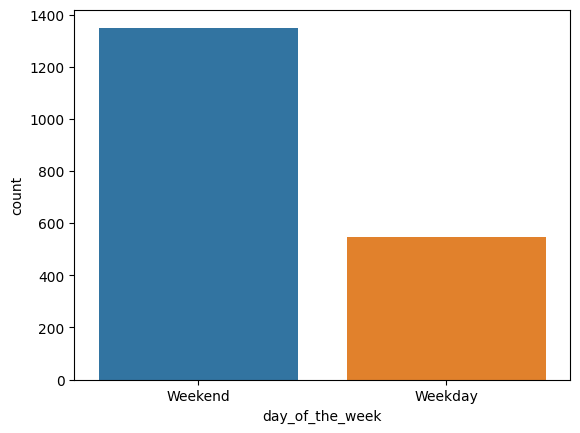

In [ ]:
df['day_of_the_week'].nunique()
sns.countplot(data = df, x = 'day_of_the_week')
df['day_of_the_week'].value_counts()
#Countplot to show distribution of Weekend vs Weekday orders

**Day of the Week:**
- The orders are separated by either placed on a Weekday or Weekend (no futher specification on the day of the week). Although the Weekday constitutes more days out of the week, the **Weekend** was more popular for Foodhub orders (1351 orders on the Weekend and only 547 orders for Weekdays).

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

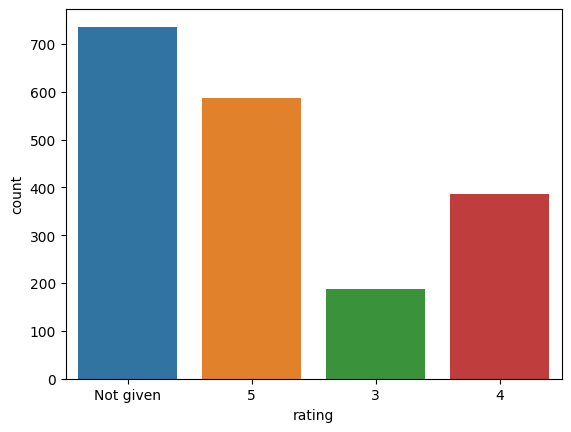

In [ ]:
df['rating'].nunique()
sns.countplot(data = df, x = 'rating')
df['rating'].value_counts()
#Countplot to show distribution of ratings

**Rating:**
- Although the majority of orders did not give a rating (736 orders), there were no ratings below a 3. There are **588** "5-star" orders, **386** "4-star" orders, and only **188** "3-star" orders present in the data.

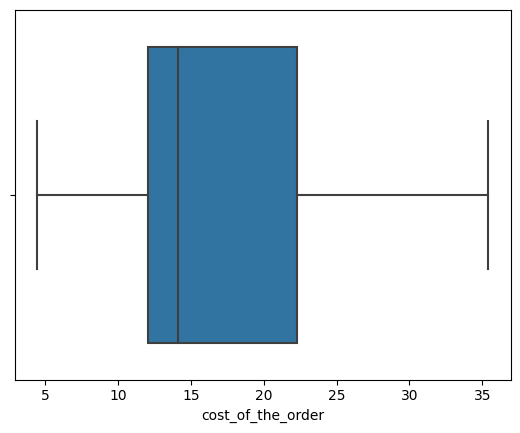

In [ ]:
sns.boxplot(data=df, x = 'cost_of_the_order')
plt.show()
#Boxplot to show a right skew in data

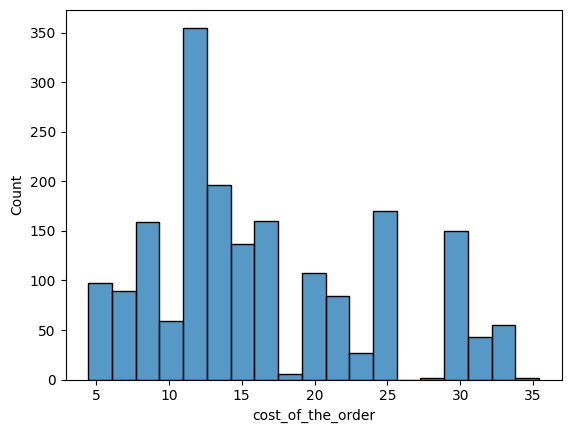

In [ ]:
sns.histplot(data=df, x = 'cost_of_the_order')
plt.show()

**Cost of the Order:**
- After analyzing a histogram and boxplot of the cost data, the data seems be skewed to the right. The average cost of an order is **$16.50**, the 25th percentile is **12.08**, the median is **14.14**, and the 75th percentile is **22.30**.

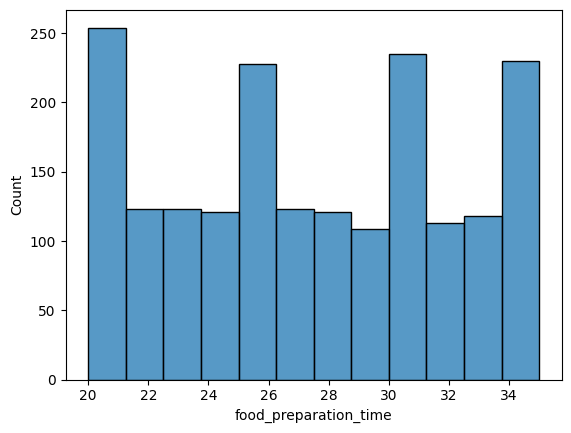

In [ ]:
sns.histplot(data=df, x = 'food_preparation_time')
plt.show()

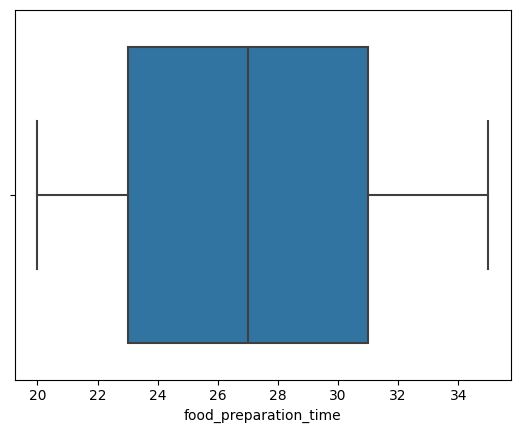

In [ ]:
sns.boxplot(data=df, x = 'food_preparation_time')
plt.show()
#Boxplot to show normal distribution

**Food Prep Time:**
- According to the boxplot for this variable, the time it takes to prepare an order is normally distributed. For all orders, the difference between the longest prep time and the shortest prep time is only 15 minutes, meaning that the data seems to be quite consistent without any outliers. The average prep time is around **27 minutes**, the 25th percentile is **23 minutes**, the median is **27 minutes**, and the 75th percentile is **31 minutes**.

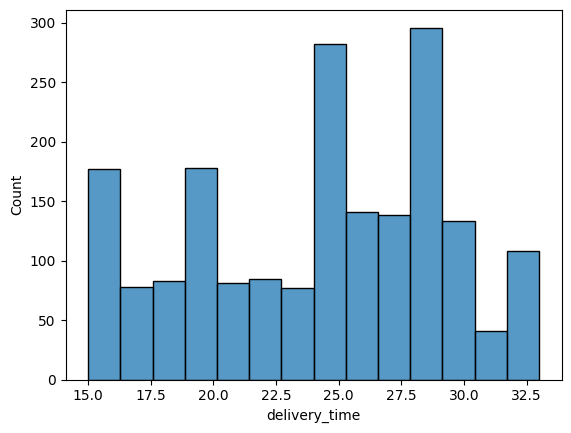

In [ ]:
sns.histplot(data=df, x = 'delivery_time')
plt.show()

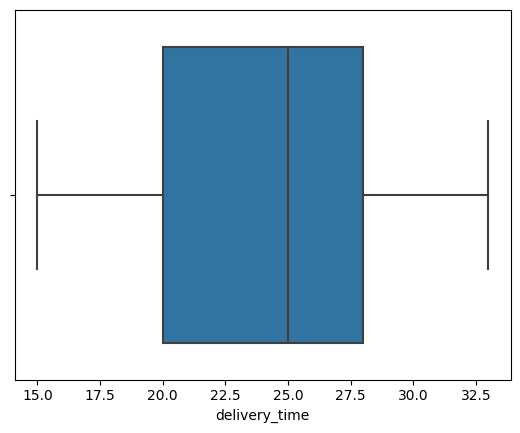

In [ ]:
sns.boxplot(data=df, x = 'delivery_time')
plt.show()
#Boxplot to show slightly left skew

**Food Delivery Time:**
- Similar to food prep time, the time it takes to deliver an order is also normally distributed (possibly very slightly left skewed). The average delivery time is about 24 minutes, the 25th percentile is **20 minutes**, the median is **25 minutes**, and the 75th percentile is **28 minutes**.




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts()
#Pulls 5 most frequent restaurant names

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations: In terms of orders received, the top 5 restaurants are **Shake Shack** (219 orders), **The Meatball Shop** (132 orders), **Blue Ribbon Sushi** (119 orders), **Blue Ribbon Fried Chicken** (96 orders), and **Parm** (68 orders).


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df_weekends = df[df['day_of_the_week'] == 'Weekend']
#df_weekends only contains Weekend data
df_weekends['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: The most popular type of cuisine on the weekend is **American food** (415 orders).


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
df_more_than_20 = df[df['cost_of_the_order']>20]
percent = (df_more_than_20.shape[0] / df.shape[0]) * 100
#Output is percent of total costs that are more than $20
print("The percentage of orders that cost more than 20 dollars is:", round(percent,2), '%')

The percentage of orders that cost more than 20 dollars is: 29.24 %


#### Observations: The percentage of orders that cost more than 20 dollars is **29.24%**.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = df['delivery_time'].mean()
print('The mean order delivery time is', round(mean_delivery_time, 2), 'minutes')

The mean order delivery time is 24.16 minutes


#### Observations: The mean order delivery time is **24.16 minutes**.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)
#head(3) pulls the top 3 customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The 3 most frequent customers that will receive the 20% discount are **Customer 52832** (13 orders), **Customer 47440** (10 orders), and **Customer 83287** (9 orders).


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


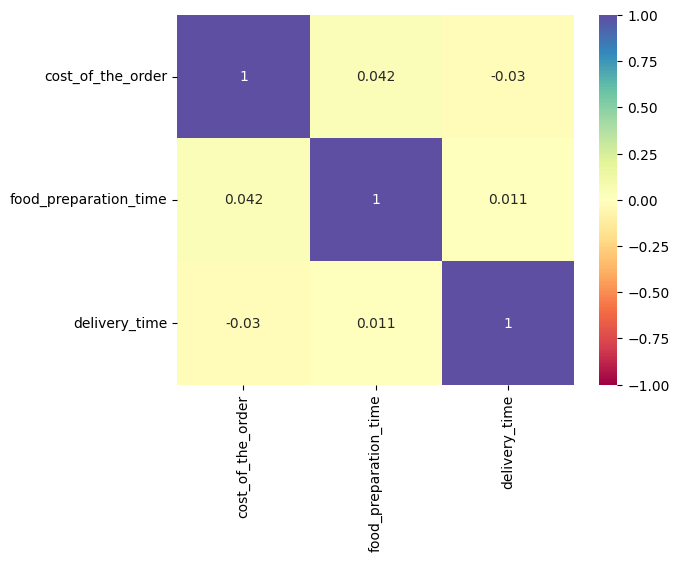

In [ ]:
#Start with looking for correlation for any initial insights
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(df[col_list].corr(), annot = True, vmin = -1, vmax = 1, cmap = "Spectral")
plt.show()

**Correlation:** There does not seem to be a strong correlation between cost of the order, food prep time, and delivery time


In [ ]:
#Most successful restaurants
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

**Restauraunt Names and Total Order Costs:** After looking at the gross revenue from each restaurant, it is clear that Shake Shack is benefiting the most from FoodHub. Not only do they represent the majority of orders on the platform, but they earned $1,434.32 more than the next best-performing restaurant (The Meatball Shop).

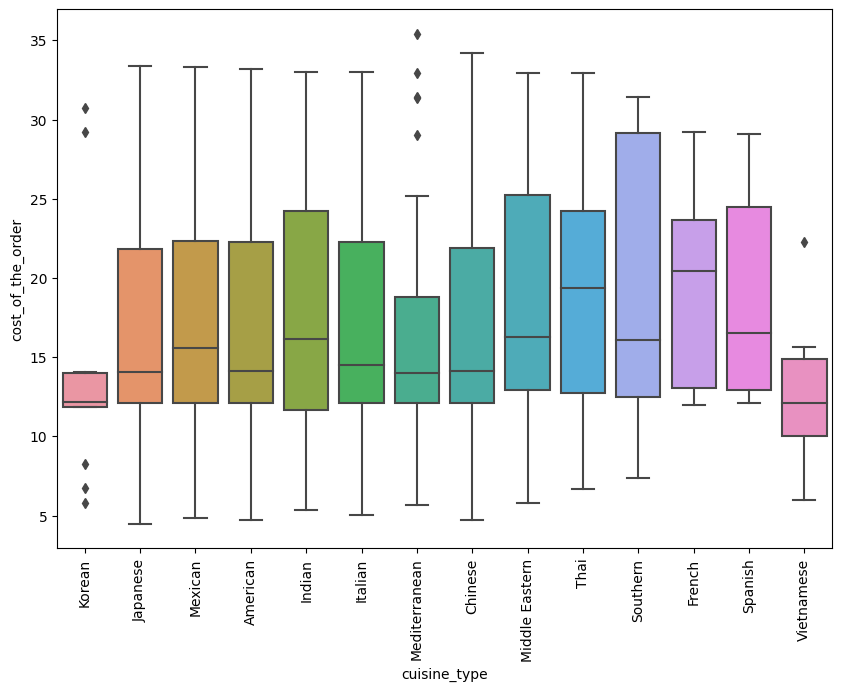

In [ ]:
#Relation between Cost of the Order and Cuisine
plt.figure(figsize=(10,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 90)
plt.show()

**Cost of the Order and Cuisine:** The highest cost of an order is from Mediterranean cusisine, and the lowest was a Japanese order. The highest median cost comes from French food. The most variance in cost comes from Southern food. In terms of outliers, there seems to be a handful from both Korean food and Mediterranean food, with 1 in Vietnamese orders. Overall, boxplots give us a sense of how different cusisine orders are ususally priced and how cost varies between them.

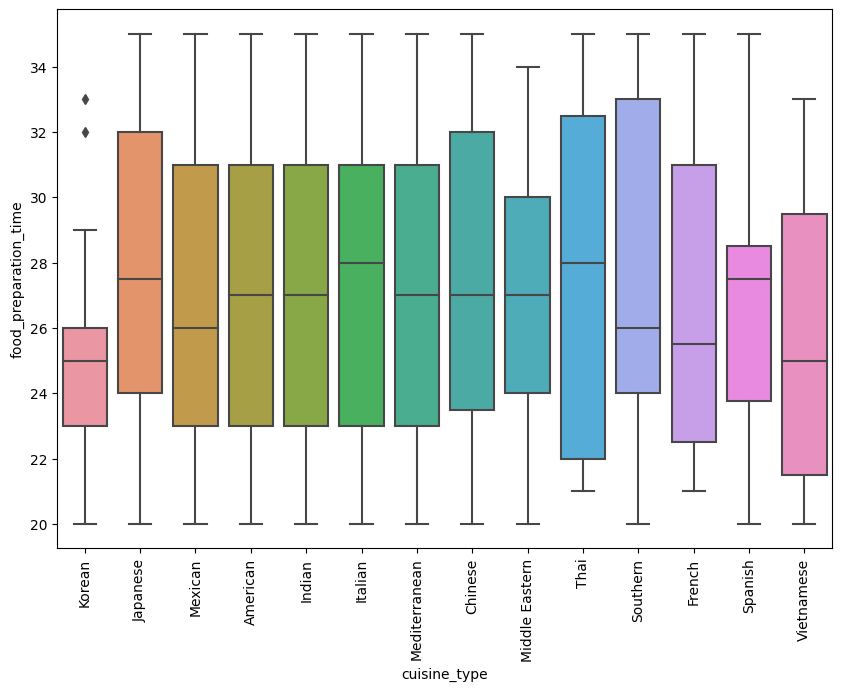

In [ ]:
#Relation between Food Prep Time and Cuisine
plt.figure(figsize=(10,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 90)
plt.show()

**Food Prep Time and Cuisine:** This boxplot depicts how long it takes to prepare orders from each cuisine type. As mentioned before, across the data, the food preparation time across all orders only varies about 15 minutes. We see this prevelant across all cuisines except Korean, Middle Eastern, Thai, French, and Vietnamese. For Korean cusine, for example, customers can expect their orders to be prepared within 20 to 29 minutes which shows the most costistent prep time (barring 2 outliers). Additionally, it is safe to assume that Cuisine type and delivery time have no relation due to the fact that this does not affect the delivery driver's ability to complete the order any faster/slower.

<Figure size 1000x700 with 0 Axes>

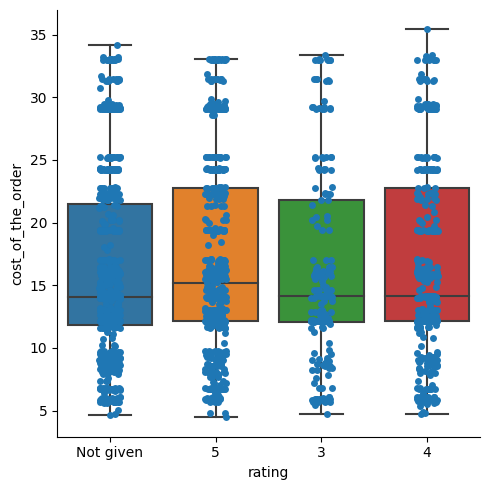

In [ ]:
#Relation between Cost of the Order and Rating
plt.figure(figsize=(10,7))
sns.catplot(x = 'rating', y = 'cost_of_the_order', data = df)
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

**Cost of the Order and Rating:** Since most of the orders did not receive a rating, it might not make sense to draw definitive conclusions about the relation here. However, according to the plots above, it seems that the majority of the 5-star ratings come from more expensive orders (median is the highest out of all ratings).

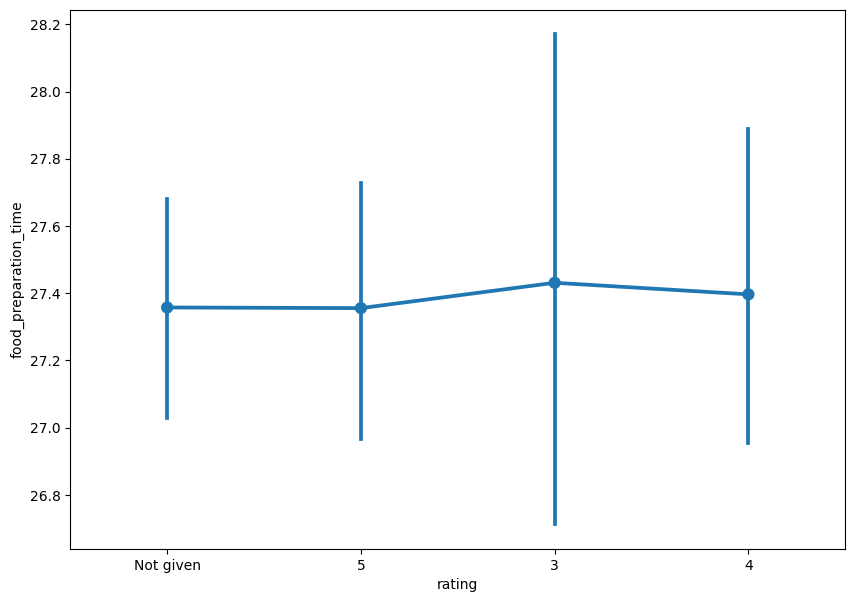

In [ ]:
#Relation between Food Prep Time and Rating
plt.figure(figsize=(10,7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

**Food Prep Time and Rating:** Negating the orders with no ratings given, the orders with the smallest variance in prep time received the highest ratings. "3-star" ratings showed the highest amount of prep time, which could indicate that customers drop the rating when they wait longer. Interestingly enough, this was also true for shortest prep time. Overall, due to the majority orders not receiving a rating and the common variance of prep time only being within a few minutes, it might not make sense to use the rating variable when trying to improve the customer experience.

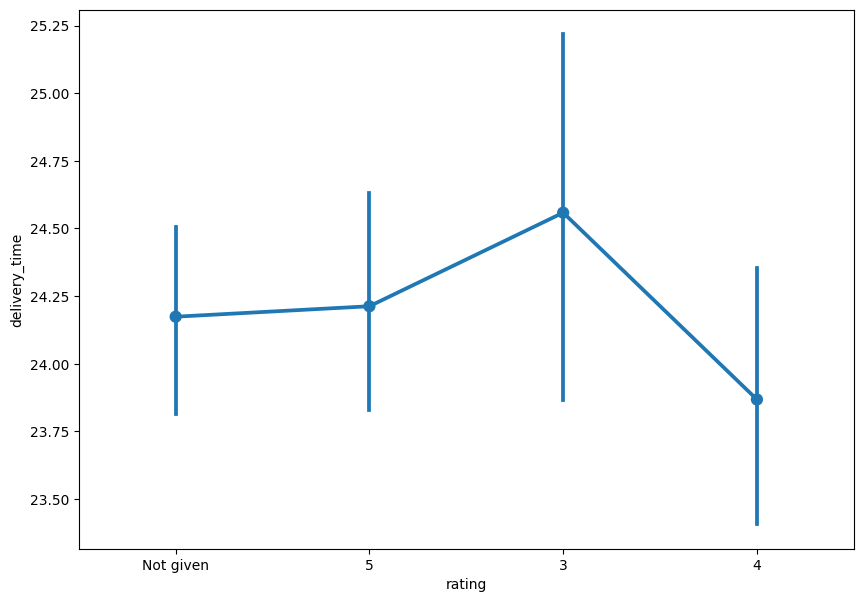

In [ ]:
#Relation between Food Delivery Time and Rating
plt.figure(figsize=(10,7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

**Food Delivery Time and Rating:** Following the relation of prep time vs raing, we see that the "3-star" ratings had the highest delivery times. When customers wait a while for their orders to be delivered, their experience with ordering from FoodHub is not as positive. Based on the data provided on ratings, it it safe to assume that the longer the customer waits, the lower the order satisfaction is as well (barring the orders that did not give a rating).

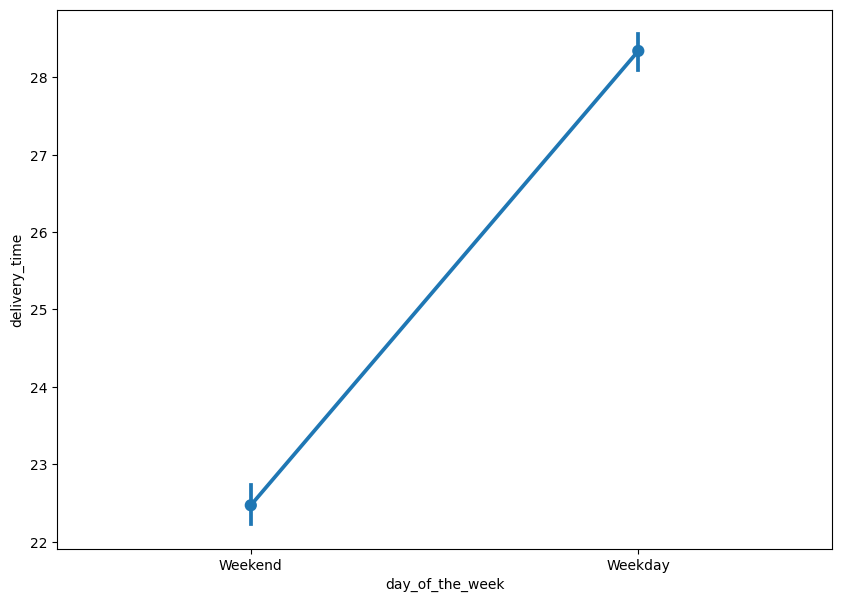

In [ ]:
#Relation between Day of the Week and Delivery Time
plt.figure(figsize=(10,7))
sns.pointplot(x = 'day_of_the_week', y = 'delivery_time', data = df)
plt.show()

**Day of the Food Delivery Time:** After visualizing the relation between day of the week and delivery time, it is safe to say that delivery times significantly spike during weekdays. This can be credited to Lunch Hours and Rush Hours, times in which many people are in commute during and after working hours. This causes delivery drivers to experience more traffic, thus increasing the delivery time on orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Get rid of orders that did not receive a rating
df_rated = df[df['rating'] != 'Not given'].copy()

#Since they are all numbers, organize as "integers"
df_rated['rating'] = df_rated['rating'].astype('int')

df_promo = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_promo.head()
#Shows how many ratings each of the top 5 restaurants

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
print('The average rating for Shake Shack is:', df_rated[df_rated['restaurant_name'] == 'Shake Shack']['rating'].mean())
print('The average rating for The Meatball Shop is:', df_rated[df_rated['restaurant_name'] == 'The Meatball Shop']['rating'].mean())
print('The average rating for Blue Ribbon Sushi is:', df_rated[df_rated['restaurant_name'] == 'Blue Ribbon Sushi']['rating'].mean())
print('The average rating for Blue Ribbon Fried Chicken is:', df_rated[df_rated['restaurant_name'] == 'Blue Ribbon Fried Chicken']['rating'].mean())

The average rating for Shake Shack is: 4.2781954887218046
The average rating for The Meatball Shop is: 4.511904761904762
The average rating for Blue Ribbon Sushi is: 4.219178082191781
The average rating for Blue Ribbon Fried Chicken is: 4.328125


#### Observations: The restaurants that are eligible for a promotional offer are **Shake Shack**, **The Meatball Shop**, **Blue Ribbon Sushi**, and **Blue Ribbon Fried Chicken**.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#Revenue function
def compute_rev(x):
  if x > 20:
    return x*0.25
  elif x > 5:
    return x*0.15
  else:
    return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
all_orders = df['Revenue'].sum()
print('Net revenue generated across all orders is', round(all_orders, 2), 'dollars')

Net revenue generated across all orders is 6166.3 dollars


#### Observations: The net revenue generated by the company across all orders is **$6,166.30.**


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_greater_than_60 = df[df['total_time']>60]
percentage_time = (df_greater_than_60.shape[0] / df.shape[0]) * 100
print("The percentage of orders that take more than 60 minutes to get delivered is:", round(percentage_time,2), '%')

The percentage of orders that take more than 60 minutes to get delivered is: 10.54 %


#### Observations:The percentage of orders that take more than 60 minutes to get delivered is **10.54%.**


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
print('Mean delivery time on Weekdays:', round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),'minutes')
print('Mean delivery time on Weekends:', round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),'minutes')

Mean delivery time on Weekdays: 28 minutes
Mean delivery time on Weekends: 22 minutes


#### Observations: The average delivery time on Weekends is **4 minutes less** than on Weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  In Conclusion, I believe that American, Japanese, Itallian, and Chinese restaurants represent a massive portion of FoodHub's orders. After looking into the top performing restaurants on the platform, it is clear that Shake Shack is the clear favorite amongst customers. The most common orders for orders that receive positive ratings are on the Weekends due to the longer wait times that come from Weekdays. Additionally, the time it takes to prepare the food does not have a major impact on the customer experience due to the small variance. However, the shorter delivery times on the Weekends can credit to more 5-star ratings since customers can receive their food quicker. The lack of ratings does hinder the relevancy of how other variables can improve the customer experience, but nonetheless, there were no ratings below a 3 (which is great news).

### Recommendations:

- My first reccomendation would be to run more promotions for customers and advertising promotions for restaurants on the weekends. It is clear that this is a popular time to order on FoodHub, as it represented 71% of orders in the data. This will not only generate more ad revenue from restaurants, but also even more orders even if the discount is small.

- My second reccomendation would be to prioritize Shake Shack with promotions slightly more than others. Not only will this help Shake Shack generate more revenue for their restaurants, but since they have the largest share of customers (and ratings), this will also generate more net revenue for FoodHub. This will also reflect positively on the customers, who may be more apt to leave a rating.

- Lastly, the best way to quantify the customer experience is when a customer leaves a rating. Unfortunately, the majority of the data did not have a review attached to the order ID. A way to further quantify this would be an additional column labeled "Most Popular Dish", where customers can rate their specific menu item. This is common with most food delivery platforms, where new customers can see what menu item is either the most popular or trending. It can be difficult to quantify if the customer enjoyed the services of Foodhub if the entire experience cannot be collected via rating. By rating each item they ordered out of 5 (or even a thumbs up or down), not only will this help with collecting more data on customer satisfaction for other customers to see, but it will also supplement the strategic efforts of choosing what item to promote at a specific restaurant.

In [ ]:
!jupyter nbconvert --execute --to html "/content/PYF_Project_LearnerNotebook_FullCode-2.ipynb"

Traceback (most recent call last):
  File "/usr/lib/python3.10/asyncio/base_events.py", line 636, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1871, in _run_once
    event_list = self._selector.select(timeout)
  File "/usr/lib/python3.10/selectors.py", line 469, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 285, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/loc

---